# Telecom Churn

In [2]:
# Importing required libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns
import re

In [3]:
# Surpressing warnings
import warnings
warnings.filterwarnings('ignore')

## Creating the Helper Function

In [4]:
# Functions to select columns
def column_selector_dataframe(df,search_char):
    return [x for x in df.columns if re.search(search_char,x)]

def column_selector_series(series,search_char):
    return [x for x in series.keys() if re.search(search_char,x)]

def uni_val(data):
    return data.nunique().sort_values(ascending=False)

# Function to check the VIF values
def check_vif(x_train):
    vif = pd.DataFrame()
    X_train_new = x_train.drop(['const'], axis=1).copy(deep=True)
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

# Data Analysis / Inspection

In [5]:
# Reading the data
raw_data = pd.read_csv('telecom_churn_data.csv')

In [6]:
# Chaging the display settings
pd.options.display.max_info_columns = 226 
pd.options.display.max_rows = 226
pd.options.display.max_columns = 226

In [7]:
# Checking the dimensions of the data
raw_data.shape

(99999, 226)

In [8]:
# Head
raw_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [9]:
# Info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

# Removing Unwanted Columns

Since, we are only using the usage data to define churn, we can remove all the revenue related data.  

In [10]:
# Droping Mobile and circle ID
droping_columns = column_selector_dataframe(raw_data,'^mobile|^circle')
droping_columns

['mobile_number', 'circle_id']

In [11]:
# Dropping the columns
usage_based_data = raw_data.drop(droping_columns,axis=1)

In [12]:
# Checking the new dimensions of the data
usage_based_data.shape

(99999, 224)

In [13]:
# Info
usage_based_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 224 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loc_og_t2o_mou            98981 non-null  float64
 1   std_og_t2o_mou            98981 non-null  float64
 2   loc_ic_t2o_mou            98981 non-null  float64
 3   last_date_of_month_6      99999 non-null  object 
 4   last_date_of_month_7      99398 non-null  object 
 5   last_date_of_month_8      98899 non-null  object 
 6   last_date_of_month_9      98340 non-null  object 
 7   arpu_6                    99999 non-null  float64
 8   arpu_7                    99999 non-null  float64
 9   arpu_8                    99999 non-null  float64
 10  arpu_9                    99999 non-null  float64
 11  onnet_mou_6               96062 non-null  float64
 12  onnet_mou_7               96140 non-null  float64
 13  onnet_mou_8               94621 non-null  float64
 14  onnet

# Missing Values

In [14]:
# Function to get missing values
def get_missing(df) :
    temp = round(100*df.isnull().sum()/df.shape[0],2).sort_values(ascending=False)
    return temp[temp>0]

In [15]:
# Getting all the missing values
missing_values = get_missing(usage_based_data)
missing_values

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
fb_user_7                   74.43
count_rech_3g_7             74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
total_rech_data_7           74.43
arpu_3g_7                   74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
date_of_last_rech_data_7    74.43
count_rech_2g_7             74.43
fb_user_9                   74.08
max_rech_data_9             74.08
total_rech_data_9           74.08
date_of_last_rech_data_9    74.08
count_rech_3g_9             74.08
arpu_3g_9                   74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
night_pck_user_9            74.08
count_rech_2g_

In [16]:
# Treating variables with more that 70% missing values first
treat_missing = missing_values[missing_values>70]

treat_missing

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
fb_user_7                   74.43
count_rech_3g_7             74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
total_rech_data_7           74.43
arpu_3g_7                   74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
date_of_last_rech_data_7    74.43
count_rech_2g_7             74.43
fb_user_9                   74.08
max_rech_data_9             74.08
total_rech_data_9           74.08
date_of_last_rech_data_9    74.08
count_rech_3g_9             74.08
arpu_3g_9                   74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
night_pck_user_9            74.08
count_rech_2g_

#### Describe the variabiles to check if all the above columns can be dropped

In [17]:
# Describe
usage_based_data[treat_missing.index].describe()

,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,max_rech_data_6,total_rech_data_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,fb_user_6,fb_user_7,count_rech_3g_7,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,count_rech_2g_7,fb_user_9,max_rech_data_9,total_rech_data_9,count_rech_3g_9,arpu_3g_9,arpu_2g_9,av_rech_amt_data_9,night_pck_user_9,count_rech_2g_9,night_pck_user_8,arpu_2g_8,max_rech_data_8,arpu_3g_8,fb_user_8,total_rech_data_8,count_rech_2g_8,av_rech_amt_data_8,count_rech_3g_8
count,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25571.000000,25571.000000,25571.000000,25571.000000,25571.000000,25571.000000,25571.000000,25571.000000,25571.000000,25922.000000,25922.00000,25922.000000,25922.000000,25922.000000,25922.000000,25922.000000,25922.000000,25922.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000
mean,1.864668,0.599133,192.600982,126.393392,2.463802,89.555057,86.398003,0.025086,0.914404,0.908764,0.621720,200.981292,126.729459,2.666419,89.384120,85.914450,0.023034,2.044699,0.860968,124.94144,2.441170,0.659363,100.264116,93.712026,192.734315,0.015971,1.781807,0.020844,86.599478,125.717301,91.173849,0.890808,2.651999,2.016288,197.526489,0.635711
std,2.570254,1.274428,192.646318,108.477235,2.789128,193.124653,172.767523,0.156391,0.279772,0.287950,1.394524,196.791224,109.765267,3.031593,195.893924,176.379871,0.150014,2.768332,0.345987,111.36376,2.516339,1.411513,216.291992,171.384224,188.400286,0.125366,2.214701,0.142863,168.247852,109.437851,188.180936,0.311885,3.074987,2.720132,191.301305,1.422827
min,0.000000,0.000000,1.000000,1.000000,1.000000,-30.820000,-35.830000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,-26.040000,-15.480000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,-71.090000,-45.740000,1.000000,0.000000,0.000000,0.000000,-55.830000,1.000000,-24.490000,0.000000,1.000000,0.000000,0.500000,0.000000
25%,1.000000,0.000000,82.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,92.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,25.00000,1.000000,0.000000,0.000000,0.000000,69.000000,0.000000,1.000000,0.000000,0.000000,25.000000,0.000000,1.000000,1.000000,1.000000,87.000000,0.000000
50%,1.000000,0.000000,154.000000,145.000000,1.000000,0.480000,10.830000,0.000000,1.000000,1.000000,0.000000,154.000000,145.000000,1.000000,0.420000,8.810000,0.000000,1.000000,1.000000,145.00000,2.000000,0.000000,2.605000,14.800000,164.000000,0.000000,1.000000,0.000000,9.270000,145.000000,0.880000,1.000000,1.000000,1.000000,154.000000,0.000000
75%,2.000000,1.000000,252.000000,177.000000,3.000000,122.070000,122.070000,0.000000,1.000000,1.000000,1.000000,252.000000,177.000000,3.000000,119.560000,122.070000,0.000000,2.000000,1.000000,179.00000,3.000000,1.000000,140.010000,140.010000,252.000000,0.000000,2.000000,0.000000,122.070000,179.000000,122.070000,1.000000,3.000000,2.000000,252.000000,1.000000
max,42.000000,29.000000,7546.000000,1555.000000,61.000000,6362.280000,6433.760000,1.000000,1.000000,1.000000,35.000000,4365.000000,1555.000000,54.000000,4980.900000,4809.360000,1.000000,48.000000,1.000000,1555.00000,84.000000,49.000000,13884.310000,3467.170000,4061.000000,1.000000,40.000000,1.000000,3483.170000,1555.000000,3716.900000,1.000000,60.000000,44.000000,4076.000000,45.000000


The below columns have minimum Value of 1, which means NAN values in these columns can be replaced by 0, meaning no recahrge

- av_rech_amt_data_6
- max_rech_data_6
- total_rech_data_6
- max_rech_data_7
- av_rech_amt_data_7
- total_rech_data_7
- max_rech_data_9
- total_rech_data_9
- av_rech_amt_data_9
- max_rech_data_8
- total_rech_data_8
- av_rech_amt_data_8

In [18]:
# Columns to be imputed with 0
col_imputezero = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6',
                  'max_rech_data_7','max_rech_data_8','max_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7',
                  'av_rech_amt_data_8','av_rech_amt_data_9']

In [19]:
# Imputing the missing values with 0
usage_based_data[col_imputezero] = usage_based_data[col_imputezero].apply(lambda x:x.fillna(0))

#### Missing Values Treatment for the Categorical Variables

In [20]:
# All the categorical columns
categorical_cols =['fb_user_6','night_pck_user_6','fb_user_7','night_pck_user_7','fb_user_8',
                   'night_pck_user_8','fb_user_9','night_pck_user_9']

# Getting the value counts for all the categorical columns
for i in categorical_cols:
    print('--------------'+i+'---------')
    print(usage_based_data[i].value_counts(dropna=False))
    print('-------------------------')

--------------fb_user_6---------
NaN    74846
1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64
-------------------------
--------------night_pck_user_6---------
NaN    74846
0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64
-------------------------
--------------fb_user_7---------
NaN    74428
1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64
-------------------------
--------------night_pck_user_7---------
NaN    74428
0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64
-------------------------
--------------fb_user_8---------
NaN    73660
1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64
-------------------------
--------------night_pck_user_8---------
NaN    73660
0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64
-------------------------
--------------fb_user_9---------
NaN    74077
1.0    22318
0.0     3604
Name: fb_user_9, dtype: int64
-------------------------
--------------night_pck_user_9---------
NaN    74077
0.0    25

We can see a lot of missing values in the Categorical Columns

#### Using Mode to impute the missing Values for the Categorical data

In [21]:
# Imputing categorical columns with mode
for i in categorical_cols:
    usage_based_data[i] = usage_based_data[i].fillna(usage_based_data[i].mode()[0])
    print(usage_based_data[i].value_counts(normalize=True,dropna=False)* 100) 

1.0    97.846978
0.0     2.153022
Name: fb_user_6, dtype: float64
0.0    99.368994
1.0     0.631006
Name: night_pck_user_6, dtype: float64
1.0    97.666977
0.0     2.333023
Name: fb_user_7, dtype: float64
0.0    99.410994
1.0     0.589006
Name: night_pck_user_7, dtype: float64
1.0    97.123971
0.0     2.876029
Name: fb_user_8, dtype: float64
0.0    99.450995
1.0     0.549005
Name: night_pck_user_8, dtype: float64
1.0    96.395964
0.0     3.604036
Name: fb_user_9, dtype: float64
0.0    99.585996
1.0     0.414004
Name: night_pck_user_9, dtype: float64


We can see that the above columns are highly skewed after mode imputation as well, so we can drop these columns

In [22]:
# Dropping the Categorical values
usage_based_data.drop(categorical_cols,axis=1,inplace=True)

In [23]:
# Checking missing values 
missing_values = get_missing(usage_based_data)
missing_values

date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
count_rech_2g_7             74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
date_of_last_rech_data_7    74.43
arpu_3g_7                   74.43
count_rech_2g_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
arpu_2g_9                   74.08
count_rech_3g_9             74.08
count_rech_3g_8             73.66
arpu_3g_8                   73.66
count_rech_2g_8             73.66
arpu_2g_8                   73.66
date_of_last_rech_data_8    73.66
std_og_t2t_mou_9             7.75
std_og_t2c_mou_9             7.75
std_og_mou_9                 7.75
onnet_mou_9                  7.75
isd_ic_mou_9                 7.75
isd_og_mou_9                 7.75
std_ic_t2m_mou_9             7.75
og_others_9                  7.75
loc_og_t2f_mou_9             7.75
loc_ic_t2f_mou

In [24]:
# Getting all Date columns
date_columns = column_selector_series(missing_values,'\Bdate|date|^last')
date_columns

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_9',
 'date_of_last_rech_data_8',
 'date_of_last_rech_9',
 'date_of_last_rech_8',
 'date_of_last_rech_7',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'last_date_of_month_8',
 'last_date_of_month_7']

### Dropping the Date Columns

In [25]:
# Droping all the date related columns
usage_based_data.drop(date_columns,axis=1,inplace=True)

In [26]:
# Checking all the missing values 
missing_values = get_missing(usage_based_data)
missing_values

count_rech_3g_6     74.85
count_rech_2g_6     74.85
arpu_3g_6           74.85
arpu_2g_6           74.85
count_rech_3g_7     74.43
count_rech_2g_7     74.43
arpu_3g_7           74.43
arpu_2g_7           74.43
count_rech_3g_9     74.08
count_rech_2g_9     74.08
arpu_2g_9           74.08
arpu_3g_9           74.08
arpu_2g_8           73.66
count_rech_3g_8     73.66
count_rech_2g_8     73.66
arpu_3g_8           73.66
loc_og_t2c_mou_9     7.75
loc_og_t2f_mou_9     7.75
loc_og_mou_9         7.75
std_og_t2f_mou_9     7.75
std_og_t2m_mou_9     7.75
std_og_t2c_mou_9     7.75
og_others_9          7.75
isd_og_mou_9         7.75
loc_ic_t2t_mou_9     7.75
loc_ic_t2m_mou_9     7.75
loc_ic_t2f_mou_9     7.75
loc_ic_mou_9         7.75
std_ic_t2t_mou_9     7.75
std_ic_t2m_mou_9     7.75
std_ic_t2f_mou_9     7.75
std_ic_t2o_mou_9     7.75
std_ic_mou_9         7.75
std_og_mou_9         7.75
spl_ic_mou_9         7.75
isd_ic_mou_9         7.75
ic_others_9          7.75
std_og_t2t_mou_9     7.75
spl_og_mou_9

In [27]:
# info
usage_based_data[missing_values.keys()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 135 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   count_rech_3g_6   25153 non-null  float64
 1   count_rech_2g_6   25153 non-null  float64
 2   arpu_3g_6         25153 non-null  float64
 3   arpu_2g_6         25153 non-null  float64
 4   count_rech_3g_7   25571 non-null  float64
 5   count_rech_2g_7   25571 non-null  float64
 6   arpu_3g_7         25571 non-null  float64
 7   arpu_2g_7         25571 non-null  float64
 8   count_rech_3g_9   25922 non-null  float64
 9   count_rech_2g_9   25922 non-null  float64
 10  arpu_2g_9         25922 non-null  float64
 11  arpu_3g_9         25922 non-null  float64
 12  arpu_2g_8         26339 non-null  float64
 13  count_rech_3g_8   26339 non-null  float64
 14  count_rech_2g_8   26339 non-null  float64
 15  arpu_3g_8         26339 non-null  float64
 16  loc_og_t2c_mou_9  92254 non-null  float

In [28]:
# filling all the null values with 0
usage_based_data.fillna(0,inplace=True)

In [29]:
# Checking missing values
missing_values = get_missing(usage_based_data)
missing_values

Series([], dtype: float64)

# High Valued Customers

In [30]:
# Getting the average recharge of each customer in the good phase
usage_based_data['avg_rech_good_phase'] = usage_based_data[['total_rech_amt_6','total_rech_amt_7']].sum(axis=1)/2

In [31]:
# 70th percentile 
avg = usage_based_data['avg_rech_good_phase'].quantile(0.7)
avg

368.5

In [32]:
# Sellecting the high valued customers
high_value_customers = usage_based_data[usage_based_data['avg_rech_good_phase']>=avg]

In [33]:
# Checking the shape
high_value_customers.shape

(30011, 206)

# Preparing the target column (Churn)

In [34]:
# Checking for missing values
high_value_customers[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30011 non-null  float64
 1   total_og_mou_9  30011 non-null  float64
 2   vol_2g_mb_9     30011 non-null  float64
 3   vol_3g_mb_9     30011 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [35]:
# Churn condition
churn_condition = high_value_customers[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)

In [36]:
# Creating the churn column
high_value_customers['churn'] = np.where(churn_condition>0,0,1)

In [37]:
# Selecting the columns of month 9
droping_columns = column_selector_dataframe(usage_based_data,'_9$')
droping_columns

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [38]:
# Droping the columns of month 9
high_value_customers.drop(droping_columns,inplace=True,axis=1)

# Checking the shape
high_value_customers.shape

(30011, 158)

# Churn Rate

In [39]:
# Churn Rate
round(high_value_customers['churn'].value_counts(normalize=True)*100,2)

0    91.36
1     8.64
Name: churn, dtype: float64

# Checking the Correlation among the variable

In [40]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
telecom_data_corr = high_value_customers.corr()
telecom_data_corr.loc[:,:] = np.tril(telecom_data_corr, k=-1)
telecom_data_corr = telecom_data_corr.stack()
telecom_data_corr
telecom_data_corr[(telecom_data_corr > 0.80) | (telecom_data_corr < -0.80)].sort_values(ascending=False).head(10)

sachet_2g_8       count_rech_2g_8    0.981607
sachet_2g_7       count_rech_2g_7    0.979649
sachet_2g_6       count_rech_2g_6    0.976342
total_rech_amt_8  arpu_8             0.953725
isd_og_mou_8      isd_og_mou_7       0.941347
total_rech_amt_6  arpu_6             0.941256
total_rech_amt_7  arpu_7             0.937114
arpu_2g_6         arpu_3g_6          0.937111
arpu_2g_8         arpu_3g_8          0.934649
arpu_2g_7         arpu_3g_7          0.933079
dtype: float64

##### Dropping the Revenue related columns as the purpose of the case study is to find the important variables based on the Usage

In [41]:
droping_columns = column_selector_dataframe(high_value_customers,'\Brech|^arpu|\Bvbc|\Bdate|\Bamt')
droping_columns

['last_date_of_month_6',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'sep_vbc_3g',
 'avg_rech_good_phase']

In [42]:
high_value_customers.drop(droping_columns,axis=1,inplace=True)

# Deriving new features

In [43]:
# description
high_value_customers.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn
count,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,0.0,0.0,0.0,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,94.680696,95.729729,87.139995,181.279583,181.271524,167.591199,6.97933,7.097268,6.494314,1.567160,1.862229,1.712739,282.948414,284.107492,261.233938,189.753131,199.877508,172.196408,203.097767,213.411914,179.568790,2.010766,2.034241,1.789728,0.0,0.0,0.0,394.865994,415.327988,353.558826,2.264425,2.207400,2.029314,5.916364,7.425487,6.885193,0.692507,0.047600,0.059131,686.697541,709.124730,623.774684,68.749054,70.311351,65.936968,159.613810,160.813032,153.628517,15.595629,16.510023,14.706512,243.968340,247.644401,234.281577,16.229350,16.893723,15.051559,32.015163,33.477150,30.434765,2.874506,2.992948,2.680925,0.0,0.0,0.0,51.122992,53.36786,48.170990,307.512073,314.875472,295.426531,0.066731,0.018066,0.027660,1

In [44]:
# Selecting the columns related to talktime
only_talktime = high_value_customers[column_selector_dataframe(high_value_customers,'^total')].sum(axis=1)

# Selecting columns related to data usage
only_data = high_value_customers[column_selector_dataframe(high_value_customers,'^vol')].sum(axis=1)

In [45]:
high_value_customers['only_talktime'] = np.where((only_talktime>0) & (only_data==0),1,0)
high_value_customers['only_data'] = np.where((only_talktime==0) & (only_data>0),1,0)
high_value_customers['talktime_and_data'] = np.where((only_talktime>0) & (only_data>0),1,0)
high_value_customers['no_talktime_no_data'] = np.where((only_talktime==0) & (only_data==0),1,0)

In [46]:
#Derving the Tenure Attribute, which helps to find the Age of the customer with the Telecom Company
high_value_customers['tenure'] = (usage_based_data['aon']/30).round(0)

In [47]:
high_value_customers['tenure'].isnull().sum()

0

#### Buckting the Tenure variables 

In [48]:
tn_range = [0, 6, 12, 24, 60, 100]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
high_value_customers['tenure_range'] = pd.cut(high_value_customers['tenure'], tn_range, labels=tn_label)
high_value_customers['tenure_range'].head()

7             2-5 Yrs
8         6-12 Months
13    5 Yrs and above
16            1-2 Yrs
17            1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

In [49]:
usage_based_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_good_phase
0,0.0,0.0,0.0,6/30/2014,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,307.0
1,0.0,0.0,0.0,6/30/2014,34.047,3

# EDA

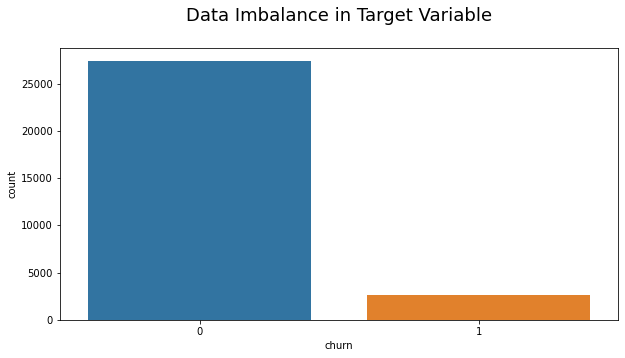

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(high_value_customers.churn)
plt.title('Data Imbalance in Target Variable\n',fontsize=18)
plt.show()

#### Observations

- We can clearly see that there is high imbalance in the Target Variable

In [51]:
tenure_churn = round(100*high_value_customers.groupby('tenure_range')['churn'].value_counts(normalize = True),2)

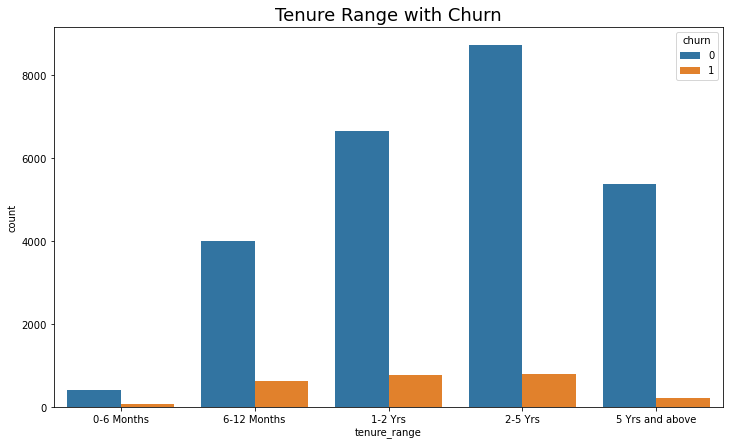

In [52]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.countplot(x='tenure_range', data=high_value_customers,hue='churn')
plt.title('Tenure Range with Churn',fontsize=18)
plt.show()

#### Observations

- We can see that the Maximu Churn happens in 0-6 months of Window.
- Overall there are higher chances of Churn in the 1st year.

In [53]:
tenure_churn

tenure_range     churn
0-6 Months       0        83.06
                 1        16.94
6-12 Months      0        86.42
                 1        13.58
1-2 Yrs          0        89.40
                 1        10.60
2-5 Yrs          0        91.63
                 1         8.37
5 Yrs and above  0        96.13
                 1         3.87
Name: churn, dtype: float64

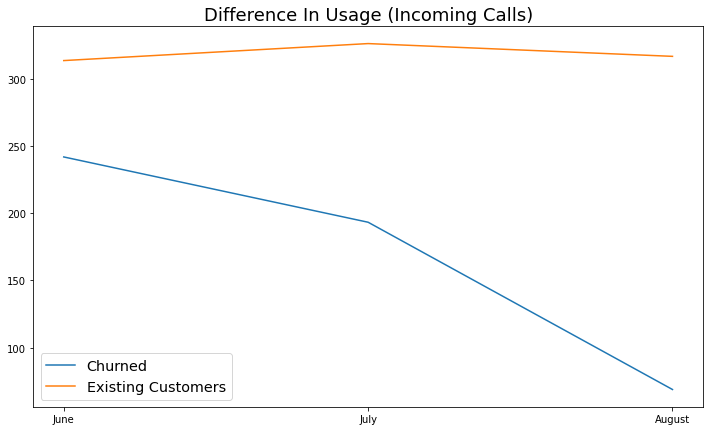

In [54]:
incoming = high_value_customers[high_value_customers['churn']==1]
temp = incoming[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']].mean()
incoming_1 = high_value_customers[high_value_customers['churn']==0]
temp_1 = incoming_1[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']].mean()


plt.figure(figsize=[12,7])
line1 = sns.lineplot(x=[1,2,3],y=temp.values)
line2 = sns.lineplot(x=[1,2,3],y=temp_1.values)
plt.xticks(ticks=[1,2,3],labels=['June','July','August'])
plt.legend(('Churned','Existing Customers'),loc='best',fontsize='x-large')
plt.title('Difference In Usage (Incoming Calls)',fontsize=18)
plt.show()

#### Observations

- We can clearly see from the above graph that the Churned Customers have significant drop in the Incoming minutes of usage fin the month of August.
- The Customer who have not churned have probably more or less the same incoming usage numbers across all the months.

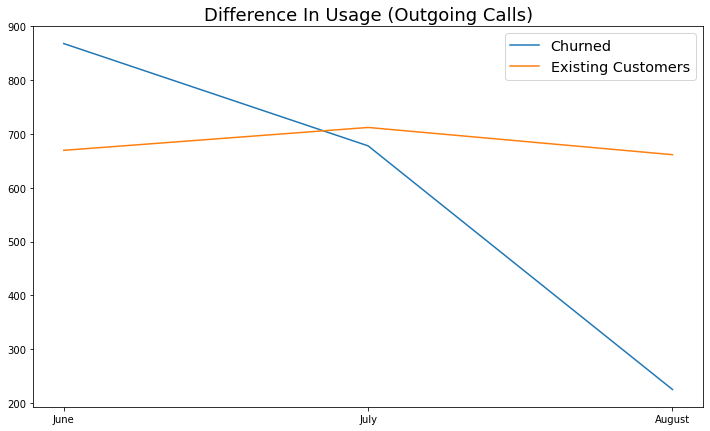

In [55]:
incoming = high_value_customers[high_value_customers['churn']==1]
temp = incoming[['total_og_mou_6','total_og_mou_7','total_og_mou_8']].mean()
incoming_1 = high_value_customers[high_value_customers['churn']==0]
temp_1 = incoming_1[['total_og_mou_6','total_og_mou_7','total_og_mou_8']].mean()


plt.figure(figsize=[12,7])
line1 = sns.lineplot(x=[1,2,3],y=temp.values)
line2 = sns.lineplot(x=[1,2,3],y=temp_1.values)
plt.xticks(ticks=[1,2,3],labels=['June','July','August'])
plt.legend(('Churned','Existing Customers'),loc='best',fontsize='x-large')
plt.title('Difference In Usage (Outgoing Calls)',fontsize=18)
plt.show()

#### Observations

- We can clearly see from the above graph that there is kind of a linear drop in the outgoing minutes of usage in the month of August for the customers who have churned.
- The Customer who have not churned have probably more or less the same Outgoing usage across all months.

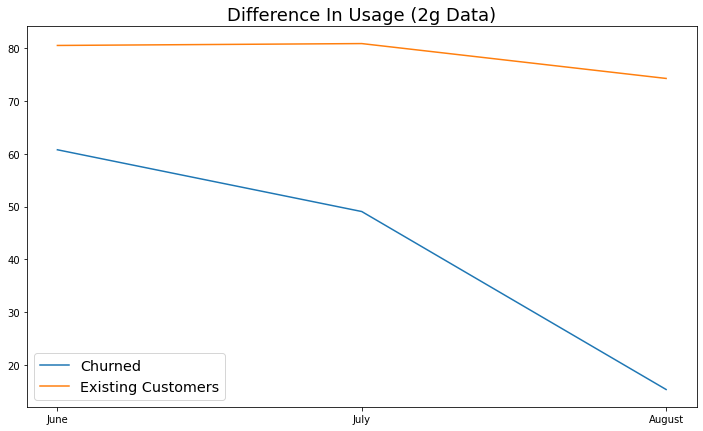

In [56]:
incoming = high_value_customers[high_value_customers['churn']==1]
temp = incoming[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8']].mean()
incoming_1 = high_value_customers[high_value_customers['churn']==0]
temp_1 = incoming_1[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8']].mean()


plt.figure(figsize=[12,7])
line1 = sns.lineplot(x=[1,2,3],y=temp.values)
line2 = sns.lineplot(x=[1,2,3],y=temp_1.values)
plt.xticks(ticks=[1,2,3],labels=['June','July','August'])
plt.legend(('Churned','Existing Customers'),loc='best',fontsize='x-large')
plt.title('Difference In Usage (2g Data)',fontsize=18)
plt.show()

#### Observations

- Its visible from the above plot that the persons churing have significant drop in the 2g usage in the month of August
- The Customer who have not churned have probably more or less 2g data Usage.

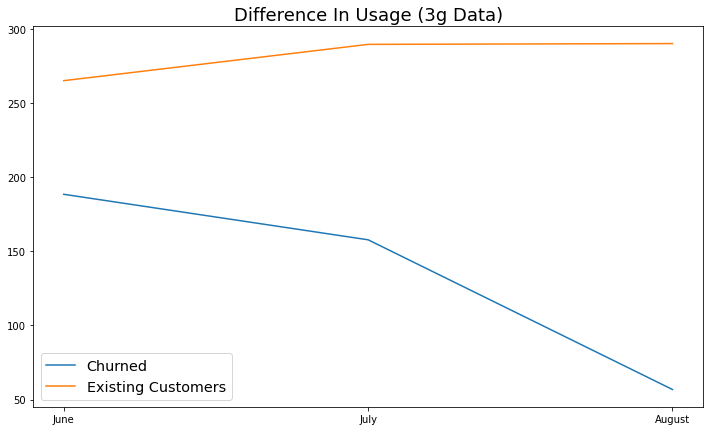

In [57]:
incoming = high_value_customers[high_value_customers['churn']==1]
temp = incoming[['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].mean()
incoming_1 = high_value_customers[high_value_customers['churn']==0]
temp_1 = incoming_1[['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].mean()


plt.figure(figsize=[12,7])
line1 = sns.lineplot(x=[1,2,3],y=temp.values)
line2 = sns.lineplot(x=[1,2,3],y=temp_1.values)
plt.xticks(ticks=[1,2,3],labels=['June','July','August'])
plt.legend(('Churned','Existing Customers'),loc='best',fontsize='x-large')
plt.title('Difference In Usage (3g Data)',fontsize=18)
plt.show()

#### Observations

- The Customer who have  churned have significant drop in the 3g usage in the month of August

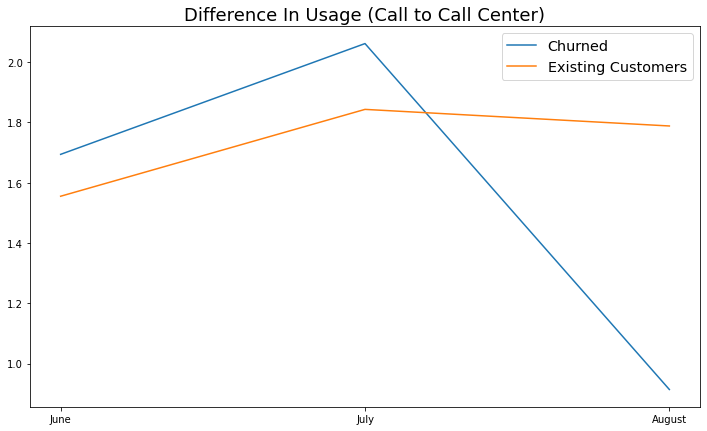

In [58]:
incoming = high_value_customers[high_value_customers['churn']==1]
temp = incoming[['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8']].mean()
incoming_1 = high_value_customers[high_value_customers['churn']==0]
temp_1 = incoming_1[['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8']].mean()


plt.figure(figsize=[12,7])
line1 = sns.lineplot(x=[1,2,3],y=temp.values)
line2 = sns.lineplot(x=[1,2,3],y=temp_1.values)
plt.xticks(ticks=[1,2,3],labels=['June','July','August'])
plt.legend(('Churned','Existing Customers'),loc='best',fontsize='x-large')
plt.title('Difference In Usage (Call to Call Center)',fontsize=18)
plt.show()

#### Observations

- Signicant drop in the calls to the Customer Care in August for the churned customers

In [59]:
temp = high_value_customers[['only_talktime','only_data','talktime_and_data','no_talktime_no_data','churn']].groupby('churn').sum()

temp['Total'] = temp.sum(axis=1).values

temp.loc['Churn Rate'] = round(100*temp.loc[1]/temp.sum(),2)

temp

,only_talktime,only_data,talktime_and_data,no_talktime_no_data,Total
churn,,,,,
0,14482.00,105.00,12813.00,18.00,27418.00
1,1647.00,43.00,825.00,78.00,2593.00
Churn Rate,10.21,29.05,6.05,81.25,8.64


##### As the above variables seem to be skewed, so we will drop these variables

In [60]:
high_value_customers.drop(['tenure','tenure_range'],axis=1,inplace=True)

# Droping skewed columns
high_value_customers.drop(['only_data','no_talktime_no_data'], axis=1 , inplace=True)

# Removing columns with one unique value

In [61]:
# Getting unique values in each column
unique_val = high_value_customers.nunique()

# Getting columns with only 1 unique value
del_col = unique_val[unique_val==1].keys()

# Columns to drop
del_col

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [62]:
# Droping the columns
high_value_customers.drop(del_col,axis=1,inplace=True)

In [63]:
# Checking the dimensions 
high_value_customers.shape

(30011, 109)

# Handling Outliers

In [64]:
# Checking for outliers
high_value_customers.describe([0,0.25, 0.5, 0.75,0.90,0.95, 0.99, 1])

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn,only_talktime,talktime_and_data
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,94.680696,95.729729,87.139995,181.279583,181.271524,167.591199,6.97933,7.097268,6.494314,1.567160,1.862229,1.712739,282.948414,284.107492,261.233938,189.753131,199.877508,172.196408,203.097767,213.411914,179.568790,2.010766,2.034241,1.789728,394.865994,415.327988,353.558826,2.264425,2.207400,2.029314,5.916364,7.425487,6.885193,0.692507,0.047600,0.059131,686.697541,709.124730,623.774684,68.749054,70.311351,65.936968,159.613810,160.813032,153.628517,15.595629,16.510023,14.706512,243.968340,247.644401,234.281577,16.229350,16.893723,15.051559,32.015163,33.477150,30.434765,2.874506,2.992948,2.680925,51.122992,53.36786,48.170990,307.512073,314.875472,295.426531,0.066731,0.018066,0.027660,11.156530,12.360190,11.700835,1.188803,1.476889,1.237756,78.859009,78.171382,69.209105,258.392681,278.093737,269.864111,0.124854,0.131352,0.114058,0.500383,0.587185,0.607611,0.173903,0.185132,0.1732

In [65]:
# Capping outliers
high_value_customers = high_value_customers.clip(lower=high_value_customers.quantile(0.01), upper=high_value_customers.quantile(0.99), axis=1)

In [66]:
# Describe
high_value_customers.describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn,only_talktime,talktime_and_data
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,287.357780,295.045075,258.329317,410.134387,415.333179,365.078417,14.803628,10.634542,10.593967,25.564224,18.600768,17.576605,86.606237,86.562918,78.666618,175.798898,176.459894,163.125580,6.283114,6.399307,5.889841,1.327933,1.538465,1.473665,275.364335,276.106236,254.096310,181.937500,191.598088,164.021578,194.965241,204.888804,169.769835,1.492833,1.448338,1.276300,385.685507,405.525257,342.836661,0.792380,0.795421,0.554784,5.313965,6.621160,6.018014,0.628516,0.0,0.0,677.225921,698.375059,612.912128,62.857814,63.834547,59.902913,154.290707,155.409793,148.449001,14.120142,14.875322,13.262052,237.422338,240.872761,228.040266,12.946679,13.645923,12.136009,28.210535,29.291736,26.339635,2.100741,2.204337,1.936273,46.104216,48.184984,42.986777,300.713796,307.67722,288.705770,0.064931,0.014259,0.025970,8.296861,9.049057,8.499376,0.714463,0.905952,0.749592,71.431551,70.419545,61.649530,234.313938,254.372651,246.909963,0.123521,0.129852,0.112792,0.462427,0.542168,0.567825,0.165206,0.173137,0.163707,0.100197,0.10316

# X and Y 

In [67]:
x = high_value_customers[:]
x.drop('churn',axis=1,inplace=True)

y = high_value_customers['churn']

In [68]:
x.shape,y.shape

((30011, 108), (30011,))

In [69]:
y.value_counts()

0    27418
1     2593
Name: churn, dtype: int64

# Train and Test data

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)

In [72]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(21007, 108) (9004, 108) (21007,) (9004,)


In [73]:
y_train.value_counts(normalize=True)

0    0.913362
1    0.086638
Name: churn, dtype: float64

- We can clearly see that the dataset is highly imbalanced.
- If we build a model on the imbalanced data set then the model can be baised, as the churn rate is only 8%.|
- We will have to use some Sampling technique to balance the data set.

# Handeling data Imbalance

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
x_resampled,y_resampled = SMOTE(random_state=42).fit_resample(x_train,y_train)

In [76]:
y_resampled = pd.Series(y_resampled)
y_resampled.value_counts()

1    19187
0    19187
Name: churn, dtype: int64

In [77]:
x_resampled = pd.DataFrame(x_resampled)

In [78]:
x_resampled.tail()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,only_talktime,talktime_and_data
38369,5.790299,65.062769,10.575091,47.747948,735.266814,107.848359,1.498442,1.429149,11.935564,10.480430,25.906583,10.861536,1.711926,11.176436,1.263581,9.216828,55.245945,6.877089,0.000000,0.831505,0.000000,0.416270,24.455779,5.870524,10.930092,67.272548,8.150670,4.077034,49.555577,9.310171,26.647956,621.515431,76.304479,0.000000,0.054878,2.823653,30.726328,671.135885,88.448304,0.000000,0.0,0.0,3.200325,42.674515,13.025253,0.918203,0.0,0.0,45.777625,781.092949,109.632888,2.767993,16.786247,2.361112,3.010259,69.247986,8.424763,0.030785,0.124479,0.024093,5.810376,86.167374,10.811306,0.001338,19.020413,2.167845,1.236763,91.296162,9.619442,0.000000,0.000000,0.000000,1.239440,110.325236,11.788625,7.098001,196.985686,22.599931,0.045509,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.483076,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,0,0,0,0,0,0,0,0,339,1,0
38370,22.534794,78.151135,16.970014,210.383626,437.255207,288.753717,3.335459,4.607733,13.421104,11.027806,13.094911,10.722075,10.048476,12.686101,8.293215,16.962808,42.097372,38.733352,0.000000,0.000000,0.000000,0.000000,0.585487,0.000000,27.016044,54.788233,47.036568,7.692249,57.077817,8.390715,182.907792,369.601101,239.412051,0.923451,1.066252,0.147562,191.533011,427.754691,247.955088,0.000000,0.0,0.0,3.336798,25.791410,0.095201,0.000000,0.0,0.0,221.895854,508.344814,295.092096,16.417429,26.460436,26.367955,29.989319,69.446209,57.900654,0.000000,0.000000,1.180494,46.411508,95.911885,85.454342,2.156305,6.930640,0.000000,5.964349,9.613508,10.552052,0.000000,0.000000,0.000000,8.120653,16.548908,10.552052,56.659099,113.539741,96.011154,0.000000,0.0,0.0,2.116938,1.074189,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,0,2,0,0,0,0,0,0,284,1,0
38371,52.967249,55.687539,0.000000,90.737691,52.960432,0.000000,6.054179,0.000000,0.000000,26.562029,0.000000,0.000000,15.278621,43.926887,0.000000,51.051456,31.389010,0.000000,15.721776,3.688413,0.000000,0.000000,0.000000,0.000000,82.058671,79.011128,0.000000,25.968883,9.572148,0.000000,9.108540,20.051059,0.000000,0.000000,0.000000,0.000000,35.084241,29.630025,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,117.149729,108.647971,0.000000,12.892402,14.678657,0.000000,27.209717,20.105602,0.000000,13.799165,4.322466,0.000000,53.914919,39.120360,0.000000,17.903462,7.779075,0.000000,39.379435,6.067815,0.000000,5.883735,2.27031

In [79]:
x_resampled.shape,y_resampled.shape

((38374, 108), (38374,))

# Model Building

In [80]:
from sklearn.feature_selection import RFE,RFECV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
def sensitivity(y_true,y_pred):
    confusion = confusion_matrix(y_true,y_pred)
    return round(100*confusion[1,1]/confusion[1:].sum(),2)

results = pd.DataFrame(columns=['Model','Sensitivity'])
def update_results(model_alis,sensi,df=results):
    df.loc[len(df.index)] = [model_alis,sensi]
    return df

# Interpretable Model

## Feature Scaling 

In [82]:
x_train_scaled = x_train.copy(deep = True)
x_test_scaled = x_test.copy(deep =True)
x_resampled_scaled = x_resampled.copy(deep = True)

In [83]:
unique_val = uni_val(x_resampled_scaled.select_dtypes('number'))


unique_val = unique_val[unique_val>2]

In [84]:
# Scaling the columns
scaler =  StandardScaler()
x_resampled_scaled[unique_val.index] = scaler.fit_transform(x_resampled_scaled[unique_val.index])

# Chicking the Scaled variables
x_resampled_scaled[unique_val.index].describe()

,total_og_mou_6,total_og_mou_7,offnet_mou_6,offnet_mou_7,total_ic_mou_6,total_ic_mou_7,loc_og_mou_6,loc_ic_mou_6,onnet_mou_6,onnet_mou_7,loc_og_mou_7,loc_ic_mou_7,offnet_mou_8,loc_og_t2m_mou_6,std_og_mou_6,loc_ic_t2m_mou_6,loc_og_t2m_mou_7,std_og_mou_7,loc_ic_t2m_mou_7,total_og_mou_8,onnet_mou_8,std_og_t2m_mou_6,total_ic_mou_8,std_og_t2m_mou_7,loc_og_t2t_mou_6,loc_ic_mou_8,loc_og_mou_8,loc_og_t2t_mou_7,loc_ic_t2t_mou_6,std_og_t2t_mou_6,loc_ic_t2t_mou_7,std_og_t2t_mou_7,std_ic_mou_6,loc_ic_t2m_mou_8,loc_og_t2m_mou_8,std_ic_mou_7,std_og_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_og_t2m_mou_8,std_ic_t2t_mou_6,loc_og_t2t_mou_8,loc_ic_t2t_mou_8,std_ic_t2t_mou_7,std_og_t2t_mou_8,loc_ic_t2f_mou_6,std_ic_mou_8,spl_og_mou_6,spl_og_mou_7,roam_og_mou_8,loc_ic_t2f_mou_7,roam_ic_mou_8,std_ic_t2m_mou_8,roam_og_mou_7,roam_ic_mou_7,vol_2g_mb_6,loc_og_t2f_mou_6,roam_og_mou_6,vol_2g_mb_7,std_ic_t2t_mou_8,loc_og_t2f_mou_7,roam_ic_mou_6,loc_ic_t2f_mou_8,spl_og_mou_8,isd_ic_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_6,ic_others_6,isd_ic_mou_7,vol_3g_mb_6,vol_3g_mb_7,og_others_6,vol_2g_mb_8,std_ic_t2f_mou_6,loc_og_t2f_mou_8,vol_3g_mb_8,spl_ic_mou_6,ic_others_7,std_ic_t2f_mou_7,isd_ic_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_6,sachet_2g_6,std_og_t2f_mou_7,isd_og_mou_6,isd_og_mou_7,aon,ic_others_8,std_ic_t2f_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_ic_mou_7,spl_ic_mou_8,sachet_2g_8,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_7,sachet_3g_6,sachet_3g_8,monthly_2g_6,monthly_2g_8,monthly_2g_7
count,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04,3.837400e+04
mean,1.579069e-15,-2.497206e-16,6.497469e-16,2.117073e-17,9.304548e-16,-2.864259e-15,-2.414375e-15,1.881081e-15,-6.771698e-16,5.517410e-17,-2.837706e-15,1.040336e-15,3.328687e-15,-3.991821e-15,1.080729e-15,-2.246349e-15,-1.798452e-15,2.419228e-15,-7.275629e-15,2.407860e-14,-3.969781e-15,1.751515e-15,-2.736228e-14,2.485346e-15,-1.108133e-15,2.942812e-14,2.071312e-14,7.763145e-15,4.112200e-16,2.060830e-16,4.597326e-15,-5.022783e-15,7.804022e-17,2.347455e-14,-2.003324e-14,4.201736e-15,-1.793922e-14,-5.297327e-16,5.900524e-15,-8.346371e-15,2.415874e-15,1.062071e-14,3.604156e-15,-8.929695e-16,2.133404e-14,-1.639735e-14,2.573508e-14,-3.944736e-15,-1.164209e-17,-2.307886e-15,2.686016e-14,-2.737239e-14,-3.041286e-14,1.267348e-15,6.907980e-15,2.275551e-14,-6.138947e-15,1.867528e-14,-1.648627e-14,-4.597702e-16,-3.379765e-14,-9.267424e-15,-1.468040e-14,-1.513676e-14,4.741318e-17,-2.652468e-16,-1.561100e-15,-4.094511e-15,-9.198329e-15,-1.859889e-14,1.208349e-14,8.241316e-15,-3.099050e-14,1.454510e-16,-4.800759e-14,4.822336e-14,3.087163e-15,-1.734565e-15,-1.155767e-14,1.817819e-14,-1.814620e-14,-8.853611e-15,-4.414486e-15,-1.149119e-14,-1

In [85]:
x_train_scaled.shape,x_resampled_scaled.shape,x_test_scaled.shape

((21007, 108), (38374, 108), (9004, 108))

## Logistic Regression -  Hyper Parameter Tuning

In [86]:
# logistic regression

steps = [('scaler', StandardScaler()),
         ("logistic", LogisticRegression(max_iter=500))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': np.logspace(-4, 4, 50), 'logistic__penalty': ['l2']}

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=4, param_grid=params, scoring='recall', n_jobs=-1, verbose=2,return_train_score=True)

# fiting 
model.fit(x_resampled_scaled,y_resampled)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.2min finished


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=500))]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic__penalty': ['l2']},
             return_train_score=True, scoring='recall', verbose=2)

In [87]:
# print best hyperparameters
print("Best Recall: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best Recall:  0.8919068736141906
Best hyperparameters:  {'logistic__C': 1.7575106248547894, 'logistic__penalty': 'l2'}


In [88]:
grid_pipline_logreg_cv_results = pd.DataFrame(model.cv_results_)

In [89]:
grid_pipline_logreg_cv_results.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
26,6.742722,0.168650,0.061149,0.014397,1.75751,l2,"{'logistic__C': 1.7575106248547894, 'logistic_...",0.844486,0.905149,0.909091,0.908901,0.891907,0.027423,1,0.902293,0.893259,0.891738,0.891313,0.894651,0.004471
27,7.275460,0.513471,0.057995,0.003460,2.55955,l2,"{'logistic__C': 2.559547922699533, 'logistic__...",0.844695,0.905149,0.909091,0.908484,0.891855,0.027269,2,0.902224,0.893259,0.892085,0.891452,0.894755,0.004360
36,7.566573,0.191956,0.057360,0.006916,75.4312,l2,"{'logistic__C': 75.43120063354607, 'logistic__...",0.845112,0.905149,0.908882,0.908276,0.891855,0.027024,3,0.901946,0.893259,0.892085,0.891313,0.894651,0.004268
47,7.624145,0.324736,0.053998,0.006623,4714.87,l2,"{'logistic__C': 4714.8663634573895, 'logistic_...",0.845112,0.905149,0.908882,0.908276,0.891855,0.027024,3,0.901946,0.893259,0.892085,0.891313,0.894651,0.004268
46,7.666750,0.223504,0.050003,0.006627,3237.46,l2,"{'logistic__C': 3237.45754281764, 'logistic__p...",0.845112,0.905149,0.908882,0.908276,0.891855,0.027024,3,0.901946,0.893259,0.892085,0.891313,0.894651,0.004268


## Feature Selection using RFE

In [90]:
# Using LogisticRegression and the best parameter value
log_reg = LogisticRegression(C=model.best_params_['logistic__C'])

# Initialization of RFE
rfe = RFE(log_reg,20)

In [91]:
# Running RFE over x_train and y_train 
rfe = rfe.fit(x_resampled_scaled,y_resampled)

# Checking the results obtained from RFE
list(zip(x_resampled_scaled.columns, rfe.support_, rfe.ranking_))

[('onnet_mou_6', False, 11),
 ('onnet_mou_7', False, 46),
 ('onnet_mou_8', False, 20),
 ('offnet_mou_6', False, 83),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 72),
 ('roam_ic_mou_7', False, 53),
 ('roam_ic_mou_8', False, 54),
 ('roam_og_mou_6', False, 84),
 ('roam_og_mou_7', False, 47),
 ('roam_og_mou_8', False, 23),
 ('loc_og_t2t_mou_6', False, 25),
 ('loc_og_t2t_mou_7', False, 38),
 ('loc_og_t2t_mou_8', False, 28),
 ('loc_og_t2m_mou_6', False, 26),
 ('loc_og_t2m_mou_7', False, 2),
 ('loc_og_t2m_mou_8', False, 60),
 ('loc_og_t2f_mou_6', False, 81),
 ('loc_og_t2f_mou_7', False, 44),
 ('loc_og_t2f_mou_8', False, 65),
 ('loc_og_t2c_mou_6', False, 73),
 ('loc_og_t2c_mou_7', False, 76),
 ('loc_og_t2c_mou_8', False, 51),
 ('loc_og_mou_6', False, 27),
 ('loc_og_mou_7', False, 24),
 ('loc_og_mou_8', False, 3),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', True, 1),
 ('std_og_t2m_mou

In [92]:
# Storing the column names 
col = x_resampled_scaled.columns[rfe.support_]
col

Index(['offnet_mou_7', 'offnet_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'total_og_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'only_talktime',
       'talktime_and_data'],
      dtype='object')

In [93]:
# Columns that were removed by RFE
x_resampled_scaled.columns[~rfe.support_]

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou

In [94]:
# Only keeping the features selected by RFE
x_resampled_scaled = x_resampled_scaled[col]

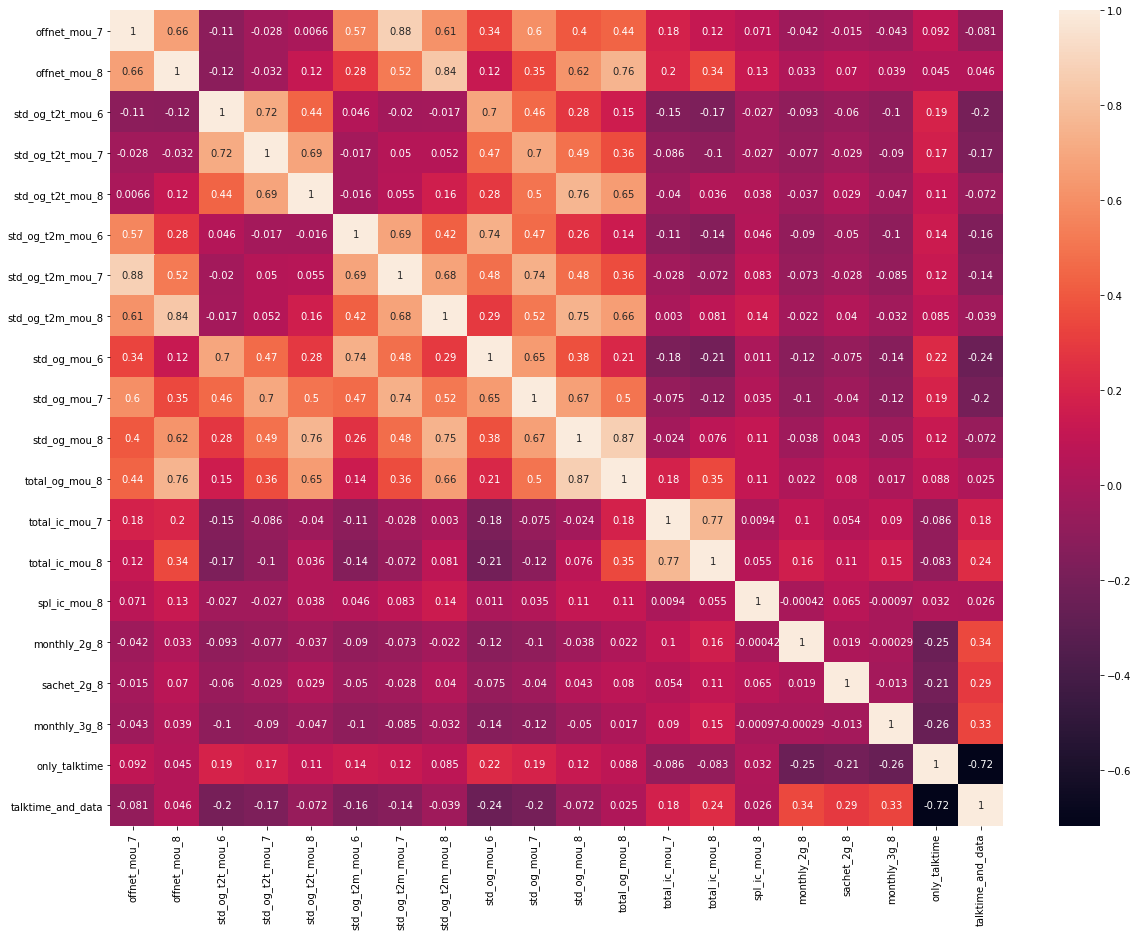

In [95]:
plt.figure(figsize=(20,15))
sns.heatmap(x_resampled_scaled.corr(),annot=True)
plt.show()

Some of the variables seem to be highly correlated , we can drop them

- Only TalkTime
- talktime_and_data
- total_og_mou_8

In [96]:
x_resampled_scaled.drop(['only_talktime','talktime_and_data','total_og_mou_8'],axis=1 , inplace=True)

## Logistic Regression - Model

In [97]:
# Adding constant to the x_train data
x_resampled_scaled = sm.add_constant(x_resampled_scaled)

In [98]:
# Running Logestic Regression
logreg_model1 = sm.GLM(y_resampled,x_resampled_scaled,family=sm.families.Binomial())

# Displaying the summary
res1 = logreg_model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38356
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15381.
Date:                Mon, 06 Sep 2021   Deviance:                       30762.
Time:                        23:11:55   Pearson chi2:                 3.95e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5260      0.021    -25.627      0.000      -0.566      -0.486
offnet_mou_7         0.2316      0.057      4.087      0.000       0.121       0.343
offnet_mou_8        -0.9710      0.060    -16.143      0.000      -1.089      -0.853
std_og_t2t_mou_6     0.5214      0.101      5.174      0.000       0.324       0.719
std_og_t2t_mou_7    -0.6919      0.108     -6.401      0.000      -0.904      -0.480
std_og_t2t_mou_8    -1.3385      0.094    -14.226      0.000      -1.523      -1.154
std_og_t2m_mou_6     0.5894      0.107      5.519      0.000       0.380       0.799
std_og_t2m_mou_7    -0.7579      0.121     -6.275      0.000      -0.995      -0.521
std_og_t2m_mou_8    -0.6413      0.100     -6.413      0.000      -0.837      -0.445
std_og_mou_6        -0.5223      0.148     -3.531      0.000      -0.812      -0.232
std_og_mou_7         1.3430      0.161      8.359      0.000       1.028       1.658
std_og_mou_8         1.2442      0.137      9.091      0.000       0.976       1.512
total_ic_mou_7       0.7800      0.035     22.308      0.000       0.711       0.849
total_ic_mou_8      -2.2790      0.051    -44.942      0.000      -2.378      -2.180
spl_ic_mou_8        -0.4882      0.026    -18.738      0.000      -0.539      -0.437
monthly_2g_8        -1.0205      0.050    -20.316      0.000      -1.119      -0.922
sachet_2g_8         -0.4933      0.022    -22.844      0.000      -0.536      -0.451
monthly_3g_8        -0.6406      0.026    -25.097      0.000      -0.691      -0.591
====================================================================================
"""

In [99]:
# Checking VIF values
check_vif(x_resampled_scaled)

,Features,VIF
9,std_og_mou_7,83.12
10,std_og_mou_8,77.94
8,std_og_mou_6,76.94
6,std_og_t2m_mou_7,50.08
3,std_og_t2t_mou_7,40.73
5,std_og_t2m_mou_6,39.72
7,std_og_t2m_mou_8,39.18
2,std_og_t2t_mou_6,36.33
4,std_og_t2t_mou_8,36.19
0,offnet_mou_7,11.88


In the first Model std_og_mou_7 is high so we can drop the column

In [100]:
# Dropping 'std_og_mou_7'
x_resampled_scaled.drop('std_og_mou_7',axis=1,inplace=True)

# Running Logestic Regression
logreg_model2 = sm.GLM(y_resampled,x_resampled_scaled,family=sm.families.Binomial())

# Displaying the summary
res2 = logreg_model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38357
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15420.
Date:                Mon, 06 Sep 2021   Deviance:                       30839.
Time:                        23:11:56   Pearson chi2:                 3.71e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5276      0.021    -25.724      0.000      -0.568      -0.487
offnet_mou_7         0.2775      0.057      4.901      0.000       0.167       0.388
offnet_mou_8        -0.9944      0.060    -16.534      0.000      -1.112      -0.877
std_og_t2t_mou_6     0.1574      0.091      1.727      0.084      -0.021       0.336
std_og_t2t_mou_7     0.1868      0.029      6.526      0.000       0.131       0.243
std_og_t2t_mou_8    -1.6341      0.083    -19.584      0.000      -1.798      -1.471
std_og_t2m_mou_6     0.2043      0.096      2.129      0.033       0.016       0.392
std_og_t2m_mou_7     0.1240      0.060      2.083      0.037       0.007       0.241
std_og_t2m_mou_8    -0.9012      0.092     -9.826      0.000      -1.081      -0.721
std_og_mou_6         0.0234      0.133      0.175      0.861      -0.238       0.285
std_og_mou_8         1.7116      0.118     14.514      0.000       1.480       1.943
total_ic_mou_7       0.7776      0.035     22.386      0.000       0.710       0.846
total_ic_mou_8      -2.2839      0.051    -45.124      0.000      -2.383      -2.185
spl_ic_mou_8        -0.4885      0.026    -18.880      0.000      -0.539      -0.438
monthly_2g_8        -1.0168      0.050    -20.250      0.000      -1.115      -0.918
sachet_2g_8         -0.4940      0.022    -22.852      0.000      -0.536      -0.452
monthly_3g_8        -0.6372      0.026    -24.985      0.000      -0.687      -0.587
====================================================================================
"""

In [101]:
# Checking VIF values
check_vif(x_resampled_scaled)

,Features,VIF
8,std_og_mou_6,67.73
9,std_og_mou_8,67.62
7,std_og_t2m_mou_8,35.47
5,std_og_t2m_mou_6,35.24
2,std_og_t2t_mou_6,32.08
4,std_og_t2t_mou_8,31.66
6,std_og_t2m_mou_7,12.76
0,offnet_mou_7,11.81
1,offnet_mou_8,9.90
3,std_og_t2t_mou_7,3.37


In Model2 the p-value for std_og_mou_6 is insignificant so dropping , its correlated as well

In [102]:
# Dropping 'std_og_mou_6'
x_resampled_scaled.drop('std_og_mou_6',axis=1,inplace=True)

# Running Logestic Regression
logreg_model3 = sm.GLM(y_resampled,x_resampled_scaled,family=sm.families.Binomial())

# Displaying the summary
res3 = logreg_model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38358
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15420.
Date:                Mon, 06 Sep 2021   Deviance:                       30839.
Time:                        23:11:57   Pearson chi2:                 3.70e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5276      0.021    -25.724      0.000      -0.568      -0.487
offnet_mou_7         0.2784      0.056      4.934      0.000       0.168       0.389
offnet_mou_8        -0.9949      0.060    -16.558      0.000      -1.113      -0.877
std_og_t2t_mou_6     0.1729      0.022      7.860      0.000       0.130       0.216
std_og_t2t_mou_7     0.1869      0.029      6.531      0.000       0.131       0.243
std_og_t2t_mou_8    -1.6383      0.080    -20.488      0.000      -1.795      -1.482
std_og_t2m_mou_6     0.2206      0.022      9.839      0.000       0.177       0.265
std_og_t2m_mou_7     0.1234      0.059      2.076      0.038       0.007       0.240
std_og_t2m_mou_8    -0.9047      0.090    -10.108      0.000      -1.080      -0.729
std_og_mou_8         1.7179      0.112     15.292      0.000       1.498       1.938
total_ic_mou_7       0.7772      0.035     22.431      0.000       0.709       0.845
total_ic_mou_8      -2.2835      0.051    -45.169      0.000      -2.383      -2.184
spl_ic_mou_8        -0.4886      0.026    -18.883      0.000      -0.539      -0.438
monthly_2g_8        -1.0167      0.050    -20.250      0.000      -1.115      -0.918
sachet_2g_8         -0.4940      0.022    -22.852      0.000      -0.536      -0.452
monthly_3g_8        -0.6371      0.025    -24.988      0.000      -0.687      -0.587
====================================================================================
"""

In [103]:
# Checking VIF values
check_vif(x_resampled_scaled)

,Features,VIF
8,std_og_mou_8,63.92
7,std_og_t2m_mou_8,34.08
4,std_og_t2t_mou_8,29.99
6,std_og_t2m_mou_7,12.75
0,offnet_mou_7,11.78
1,offnet_mou_8,9.90
3,std_og_t2t_mou_7,3.37
10,total_ic_mou_8,3.35
9,total_ic_mou_7,2.92
2,std_og_t2t_mou_6,2.23


In Model 3 the VIF for std_og_mou_8 is high so dropping the same.

In [104]:
# Dropping 'std_og_mou_8'
x_resampled_scaled.drop('std_og_mou_8',axis=1,inplace=True)

# Running Logestic Regression
logreg_model4 = sm.GLM(y_resampled,x_resampled_scaled,family=sm.families.Binomial())

# Displaying the summary
res4 = logreg_model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38359
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15536.
Date:                Mon, 06 Sep 2021   Deviance:                       31072.
Time:                        23:11:58   Pearson chi2:                 3.84e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5318      0.021    -25.916      0.000      -0.572      -0.492
offnet_mou_7         0.2753      0.056      4.901      0.000       0.165       0.385
offnet_mou_8        -0.9229      0.059    -15.615      0.000      -1.039      -0.807
std_og_t2t_mou_6     0.1753      0.022      8.021      0.000       0.132       0.218
std_og_t2t_mou_7     0.1655      0.028      5.846      0.000       0.110       0.221
std_og_t2t_mou_8    -0.4802      0.024    -20.291      0.000      -0.527      -0.434
std_og_t2m_mou_6     0.2055      0.022      9.185      0.000       0.162       0.249
std_og_t2m_mou_7     0.1317      0.059      2.224      0.026       0.016       0.248
std_og_t2m_mou_8     0.1625      0.055      2.970      0.003       0.055       0.270
total_ic_mou_7       0.7898      0.035     22.737      0.000       0.722       0.858
total_ic_mou_8      -2.3275      0.051    -45.949      0.000      -2.427      -2.228
spl_ic_mou_8        -0.4976      0.026    -19.206      0.000      -0.548      -0.447
monthly_2g_8        -1.0123      0.050    -20.165      0.000      -1.111      -0.914
sachet_2g_8         -0.4964      0.022    -22.895      0.000      -0.539      -0.454
monthly_3g_8        -0.6300      0.025    -24.770      0.000      -0.680      -0.580
====================================================================================
"""

In [105]:
# Checking VIF values
check_vif(x_resampled_scaled)

,Features,VIF
6,std_og_t2m_mou_7,12.75
0,offnet_mou_7,11.78
1,offnet_mou_8,9.88
7,std_og_t2m_mou_8,8.87
3,std_og_t2t_mou_7,3.37
9,total_ic_mou_8,3.35
8,total_ic_mou_7,2.92
2,std_og_t2t_mou_6,2.23
4,std_og_t2t_mou_8,2.09
5,std_og_t2m_mou_6,2.01


In Model 4 the VIF for std_og_t2m_mou_7 is high so dropping the same.

In [106]:
# Dropping 'std_og_t2m_mou_7'
x_resampled_scaled.drop('std_og_t2m_mou_7',axis=1,inplace=True)

# Running Logestic Regression
logreg_model5 = sm.GLM(y_resampled,x_resampled_scaled,family=sm.families.Binomial())

# Displaying the summary
res5 = logreg_model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38360
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15538.
Date:                Mon, 06 Sep 2021   Deviance:                       31077.
Time:                        23:11:58   Pearson chi2:                 3.78e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5330      0.021    -25.998      0.000      -0.573      -0.493
offnet_mou_7         0.3827      0.029     13.149      0.000       0.326       0.440
offnet_mou_8        -1.0030      0.047    -21.227      0.000      -1.096      -0.910
std_og_t2t_mou_6     0.1735      0.022      7.946      0.000       0.131       0.216
std_og_t2t_mou_7     0.1712      0.028      6.067      0.000       0.116       0.226
std_og_t2t_mou_8    -0.4813      0.024    -20.338      0.000      -0.528      -0.435
std_og_t2m_mou_6     0.2191      0.022     10.153      0.000       0.177       0.261
std_og_t2m_mou_8     0.2483      0.039      6.386      0.000       0.172       0.325
total_ic_mou_7       0.7754      0.034     22.746      0.000       0.709       0.842
total_ic_mou_8      -2.3182      0.050    -45.930      0.000      -2.417      -2.219
spl_ic_mou_8        -0.4961      0.026    -19.191      0.000      -0.547      -0.445
monthly_2g_8        -1.0109      0.050    -20.145      0.000      -1.109      -0.913
sachet_2g_8         -0.4957      0.022    -22.872      0.000      -0.538      -0.453
monthly_3g_8        -0.6282      0.025    -24.735      0.000      -0.678      -0.578
====================================================================================
"""

In [107]:
# Checking VIF values
check_vif(x_resampled_scaled)

,Features,VIF
1,offnet_mou_8,5.84
6,std_og_t2m_mou_8,4.53
3,std_og_t2t_mou_7,3.34
8,total_ic_mou_8,3.27
0,offnet_mou_7,2.87
7,total_ic_mou_7,2.75
2,std_og_t2t_mou_6,2.22
4,std_og_t2t_mou_8,2.08
5,std_og_t2m_mou_6,1.82
12,monthly_3g_8,1.05


In Model 5 the VIF for offnet_mou_8 is high so dropping the same.

In [108]:
# Dropping 'offnet_mou_8'
x_resampled_scaled.drop('offnet_mou_8',axis=1,inplace=True)

# Running Logestic Regression
logreg_model6 = sm.GLM(y_resampled,x_resampled_scaled,family=sm.families.Binomial())

# Displaying the summary
res6 = logreg_model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38361
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15802.
Date:                Mon, 06 Sep 2021   Deviance:                       31604.
Time:                        23:11:59   Pearson chi2:                 2.93e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5617      0.021    -27.387      0.000      -0.602      -0.522
offnet_mou_7         0.0788      0.023      3.388      0.001       0.033       0.124
std_og_t2t_mou_6     0.1652      0.022      7.602      0.000       0.123       0.208
std_og_t2t_mou_7     0.2204      0.028      7.806      0.000       0.165       0.276
std_og_t2t_mou_8    -0.4914      0.024    -20.710      0.000      -0.538      -0.445
std_og_t2m_mou_6     0.3486      0.021     16.466      0.000       0.307       0.390
std_og_t2m_mou_8    -0.4194      0.021    -19.617      0.000      -0.461      -0.378
total_ic_mou_7       0.9260      0.034     27.357      0.000       0.860       0.992
total_ic_mou_8      -2.7710      0.048    -58.150      0.000      -2.864      -2.678
spl_ic_mou_8        -0.4713      0.025    -18.729      0.000      -0.521      -0.422
monthly_2g_8        -1.0167      0.050    -20.206      0.000      -1.115      -0.918
sachet_2g_8         -0.4994      0.022    -23.017      0.000      -0.542      -0.457
monthly_3g_8        -0.6269      0.025    -24.729      0.000      -0.677      -0.577
====================================================================================
"""

In [109]:
# Checking VIF values
check_vif(x_resampled_scaled)

,Features,VIF
2,std_og_t2t_mou_7,3.32
7,total_ic_mou_8,2.74
6,total_ic_mou_7,2.67
0,offnet_mou_7,2.25
1,std_og_t2t_mou_6,2.22
3,std_og_t2t_mou_8,2.08
5,std_og_t2m_mou_8,1.80
4,std_og_t2m_mou_6,1.67
9,monthly_2g_8,1.04
11,monthly_3g_8,1.04


In [110]:
# Getting the predicted values on the train set
y_train_resampled_pred = res6.predict(x_resampled_scaled)
y_train_resampled_pred[:10]

0    0.036754
1    0.023768
2    0.039920
3    0.027303
4    0.001019
5    0.283556
6    0.477959
7    0.506402
8    0.000047
9    0.918917
dtype: float64

### Creating a dataframe with the actual churn flag and the predicted probabilities

In [111]:
y_train_resampled_pred_final = pd.DataFrame({'Churn':y_resampled.values, 'Churn_Prob':y_train_resampled_pred})
y_train_resampled_pred_final.head()

,Churn,Churn_Prob
0,0,0.036754
1,0,0.023768
2,0,0.039920
3,0,0.027303
4,0,0.001019


In [112]:
y_train_resampled_pred_final['predicted'] = y_train_resampled_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_resampled_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.036754,0
1,0,0.023768,0
2,0,0.039920,0
3,0,0.027303,0
4,0,0.001019,0


## Confusion matrix 

In [113]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_resampled_pred_final.Churn, y_train_resampled_pred_final.predicted )
print(confusion)

[[15016  4171]
 [ 2588 16599]]


#### Accuracy & Sensitivity

In [114]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_resampled_pred_final.Churn, y_train_resampled_pred_final.predicted))

0.8238651170063064


In [115]:
# Let's check the recall rate.
print(metrics.recall_score(y_train_resampled_pred_final.Churn, y_train_resampled_pred_final.predicted))

0.8651170063063532


In [116]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_resampled_pred_final.Churn, y_train_resampled_pred_final.Churn_Prob, drop_intermediate = False )

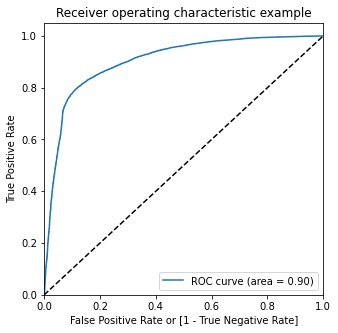

In [118]:
draw_roc(y_train_resampled_pred_final.Churn, y_train_resampled_pred_final.Churn_Prob)

## Finding Optimal Cutoff Point

In [119]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_resampled_pred_final[i]= y_train_resampled_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_resampled_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.036754,0,1,0,0,0,0,0,0,0,0,0
1,0,0.023768,0,1,0,0,0,0,0,0,0,0,0
2,0,0.039920,0,1,0,0,0,0,0,0,0,0,0
3,0,0.027303,0,1,0,0,0,0,0,0,0,0,0
4,0,0.001019,0,1,0,0,0,0,0,0,0,0,0


In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_resampled_pred_final.Churn, y_train_resampled_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.701256  0.974618  0.427894
0.2   0.2  0.746964  0.956168  0.537760
0.3   0.3  0.777610  0.931725  0.623495
0.4   0.4  0.803226  0.898681  0.707771
0.5   0.5  0.823865  0.865117  0.782613
0.6   0.6  0.837468  0.821859  0.853078
0.7   0.7  0.835045  0.754052  0.916037
0.8   0.8  0.731146  0.503987  0.958305
0.9   0.9  0.591364  0.195601  0.987127


## Plot Accuracy,Sensitivity and Specificity

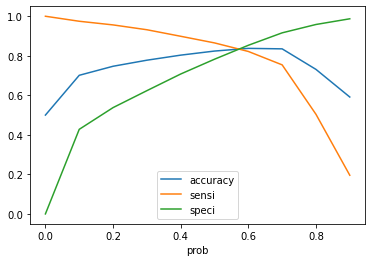

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [122]:
y_train_resampled_pred_final['final_predicted'] = y_train_resampled_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_resampled_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.036754,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.023768,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.039920,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.027303,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.001019,0,1,0,0,0,0,0,0,0,0,0,0


Since we want to maximize the Sensitivity we will take the Cut off as 0.35

#### Confusion Matrix

In [123]:
confusion2 = metrics.confusion_matrix(y_train_resampled_pred_final.Churn, y_train_resampled_pred_final.final_predicted )
confusion2

array([[12763,  6424],
       [ 1557, 17630]], dtype=int64)

In [124]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_resampled_pred_final.Churn, y_train_resampled_pred_final.final_predicted)

0.7920206389743055

In [125]:
Train_sensitivity = metrics.recall_score(y_train_resampled_pred_final.Churn, y_train_resampled_pred_final.predicted)
print(round(Train_sensitivity,3))

0.865


In [126]:
p, r, thresholds = metrics.precision_recall_curve(y_train_resampled_pred_final.Churn, y_train_resampled_pred_final.Churn_Prob)

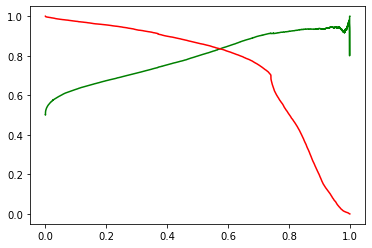

In [127]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Prediction on the Test Data Set

In [128]:
unique_val = uni_val(x_test_scaled.select_dtypes('number'))

unique_val = unique_val[unique_val>2]

In [129]:
# Scaling the columns
# scaler =  StandardScaler()
x_test_scaled[unique_val.index] = scaler.transform(x_test_scaled[unique_val.index])

# Chicking the Scaled variables
x_test_scaled[unique_val.index].describe()

,total_og_mou_7,total_og_mou_6,offnet_mou_7,offnet_mou_6,total_og_mou_8,total_ic_mou_7,total_ic_mou_6,offnet_mou_8,loc_og_mou_7,total_ic_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_og_mou_6,onnet_mou_7,onnet_mou_6,loc_ic_mou_8,loc_og_mou_8,loc_og_t2m_mou_7,loc_ic_t2m_mou_7,onnet_mou_8,loc_og_t2m_mou_6,loc_ic_t2m_mou_6,loc_og_t2m_mou_8,loc_ic_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_t2m_mou_7,std_og_t2m_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_ic_t2t_mou_7,std_og_t2m_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_8,std_og_t2t_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_8,std_ic_mou_7,std_ic_mou_6,std_ic_mou_8,std_ic_t2m_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_8,aon,vol_2g_mb_6,vol_2g_mb_7,loc_ic_t2f_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_8,vol_2g_mb_8,std_ic_t2t_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_8,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_6,spl_og_mou_7,spl_og_mou_8,roam_og_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_6,spl_og_mou_6,roam_ic_mou_6,loc_og_t2f_mou_8,roam_og_mou_7,roam_og_mou_8,isd_ic_mou_7,isd_ic_mou_8,roam_ic_mou_7,isd_ic_mou_6,roam_ic_mou_8,std_ic_t2f_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_8,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,ic_others_7,ic_others_8,ic_others_6,og_others_6,isd_og_mou_7,isd_og_mou_6,isd_og_mou_8,spl_ic_mou_6,spl_ic_mou_8,spl_ic_mou_7,sachet_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,sachet_3g_7,sachet_3g_6,sachet_3g_8,monthly_3g_8,monthly_3g_7,monthly_2g_6,monthly_2g_7,monthly_2g_8
count,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000
mean,-0.064395,0.000941,-0.053712,0.016847,1.222469,0.222628,0.266761,0.676845,-0.111900,-0.008070,0.110187,0.232518,0.042436,0.801202,-0.331874,0.596874,0.668023,-0.447364,0.216358,-0.283678,-0.037355,-0.232271,-0.062587,-0.195569,2.217618,1.162986,0.708317,1.031881,1.608250,-0.359087,0.438600,-0.333888,0.251712,0.494102,-0.215234,0.235298,-0.135382,2.921835,2.677020,-0.271360,1.095699,-0.056759,-0.110865,0.515016,-0.313153,48.219981,0.615425,5.706187,0.671469,-0.165228,0.100934,1.075202,-0.083632,-0.184394,-0.051487,0.986393,19.651889,2.118803,-0.262355,-0.085164,1.821930,-0.187525,-0.073586,0.097718,0.253445,1.079868,4.568528,6.754155,0.046166,-0.323906,-0.314503,5.033389,-0.183968,0.085494,-0.139262,-0.289752,10.491087,0.277788,-0.050692,-0.158506,0.089431,0.038872,0.407537,-0.069837,-0.052836,-0.048490,-1.210741,0.146292,-0.112521,-0.178272,-0.141580,0.018768,7.321450,0.104748,0.112546,0.081249,-0.038025,0.009428,0.066979,0.244456,0.335002,0.192663,0.250740,0.125587
std,0.933461,0.922774,0.907176,0.921368,2.102148,1.094888,1.082131,1.616530,0.720411,0.737268,0.960657,1.119124,0.894940,2.196086,0.643667,1.581626,1.714974,0.336672,1.110198,0.705590,0.603772,0.435949,0.762682,0.442776,3.922097,2.565203,2.090124,2.817366,4.105

In [130]:
cols = x_resampled_scaled.columns.tolist()
cols

['const',
 'offnet_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_8',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8']

In [131]:
cols.remove('const')

In [132]:
x_test_scaled = x_test_scaled[cols]
x_test_scaled = sm.add_constant(x_test_scaled)

In [133]:
x_test_scaled.shape

(9004, 13)

In [134]:
y_test_pred = res6.predict(x_test_scaled)

In [135]:
y_test_pred[:10]

39713    2.919243e-26
80955    9.998328e-01
80034    9.837346e-08
93911    6.482428e-02
55461    3.680584e-09
82494    2.162436e-19
95725    3.940385e-03
87183    1.378089e-01
96332    6.862915e-01
83861    7.180475e-01
dtype: float64

In [136]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [137]:
# Let's see the head
print(y_pred_1.shape)
y_pred_1.head()

(9004, 1)


,0
39713,2.919243e-26
80955,9.998328e-01
80034,9.837346e-08
93911,6.482428e-02
55461,3.680584e-09


In [138]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df

,churn
39713,0
80955,1
80034,0
93911,0
55461,0
...,...
64860,0
34580,0
69063,0
12876,1


In [139]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [140]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final.head()

,churn,Churn_Prob
39713,0,2.919243e-26
80955,1,9.998328e-01
80034,0,9.837346e-08
93911,0,6.482428e-02
55461,0,3.680584e-09


In [141]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [142]:
y_pred_final.head()

,churn,Churn_Prob,final_predicted
39713,0,2.919243e-26,0
80955,1,9.998328e-01,1
80034,0,9.837346e-08,0
93911,0,6.482428e-02,0
55461,0,3.680584e-09,0


#### Sensitivity

In [143]:
metrics.recall_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8214747736093143

## Top Variables

In [144]:
log_reg = LogisticRegression().fit(x_resampled_scaled,y_resampled)

betas = pd.DataFrame(index=x_resampled_scaled.columns)

In [145]:
betas['Log_reg'] = log_reg.coef_[0]

betas['abs_coef'] = abs(betas['Log_reg'])

betas = betas.sort_values('abs_coef',ascending=False)

betas

,Log_reg,abs_coef
total_ic_mou_8,-2.763536,2.763536
monthly_2g_8,-1.013815,1.013815
total_ic_mou_7,0.921508,0.921508
monthly_3g_8,-0.626516,0.626516
sachet_2g_8,-0.499214,0.499214
std_og_t2t_mou_8,-0.491816,0.491816
spl_ic_mou_8,-0.471082,0.471082
std_og_t2m_mou_8,-0.419783,0.419783
std_og_t2m_mou_6,0.348731,0.348731
const,-0.278664,0.278664


In [146]:
betas.head()

,Log_reg,abs_coef
total_ic_mou_8,-2.763536,2.763536
monthly_2g_8,-1.013815,1.013815
total_ic_mou_7,0.921508,0.921508
monthly_3g_8,-0.626516,0.626516
sachet_2g_8,-0.499214,0.499214


In [147]:
update_results('Log_reg_without_PCA',round(100*metrics.recall_score(y_pred_final.churn, y_pred_final.final_predicted),2))

,Model,Sensitivity
0,Log_reg_without_PCA,82.15


# Model summary - Logistic Regression without PCA

#### Train data set
- Sensitivity = 0.86

#### Test data set
- Sensitivity = 0.82

# High Performance Model

## Principal Component Analsyis

- Using the PCA to build the High Performance Models

In [148]:
# Normalizing the dataset
scaler = StandardScaler()
x_resampled_scaled = scaler.fit_transform(x_resampled)
x_test_scaled = scaler.transform(x_test)

In [149]:
# Applying the PCA 
pca = PCA(random_state=42)
pca.fit(x_resampled_scaled)

PCA(random_state=42)

In [150]:
# PCA Components
pca.components_

array([[-3.15317927e-02, -1.30643675e-02,  2.83940646e-02, ...,
         8.48105693e-02, -4.40861454e-02,  8.63762831e-02],
       [ 1.67197399e-01,  2.07576297e-01,  1.93525705e-01, ...,
        -4.69446602e-02,  1.04247075e-01, -9.36220033e-02],
       [-8.37948544e-02, -6.41507322e-02, -3.43894970e-02, ...,
        -5.85187661e-03, -1.12322249e-01,  1.19749148e-01],
       ...,
       [-3.62700264e-02,  1.55040699e-01, -1.10659913e-01, ...,
        -4.39493433e-04, -7.69490556e-04, -6.89580730e-04],
       [ 0.00000000e+00, -8.37751367e-16,  1.50786465e-15, ...,
        -4.38188904e-18,  1.00468444e-17,  2.06585673e-16],
       [-0.00000000e+00,  1.09268360e-16, -4.20717791e-17, ...,
        -1.57086186e-18, -9.81249393e-17,  2.52198742e-17]])

In [151]:
# Explaing the Variance
pca.explained_variance_ratio_

array([1.33131676e-01, 8.61731610e-02, 5.61501223e-02, 4.76604740e-02,
       4.22299827e-02, 3.72705230e-02, 3.41262369e-02, 3.11151707e-02,
       2.81748198e-02, 2.73443855e-02, 2.51571129e-02, 2.39738432e-02,
       2.08100714e-02, 2.02602862e-02, 1.87972022e-02, 1.67862234e-02,
       1.49969845e-02, 1.42771698e-02, 1.28669867e-02, 1.27820263e-02,
       1.19539643e-02, 1.17862821e-02, 1.03325318e-02, 1.02423625e-02,
       9.87934448e-03, 9.49908903e-03, 9.32276555e-03, 8.92302503e-03,
       8.41167726e-03, 8.28078288e-03, 8.08356996e-03, 7.75153790e-03,
       7.67656865e-03, 7.28878720e-03, 7.04386652e-03, 6.92750931e-03,
       6.55111596e-03, 6.28674202e-03, 6.09798650e-03, 5.61176592e-03,
       5.35811105e-03, 5.20585423e-03, 5.07693433e-03, 4.96451083e-03,
       4.85126453e-03, 4.66879076e-03, 4.51462771e-03, 4.42852240e-03,
       4.25204297e-03, 4.19739955e-03, 3.91252818e-03, 3.81299891e-03,
       3.70112887e-03, 3.43052228e-03, 3.36783109e-03, 3.23954869e-03,
      

In [152]:
# Cum_sum of explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

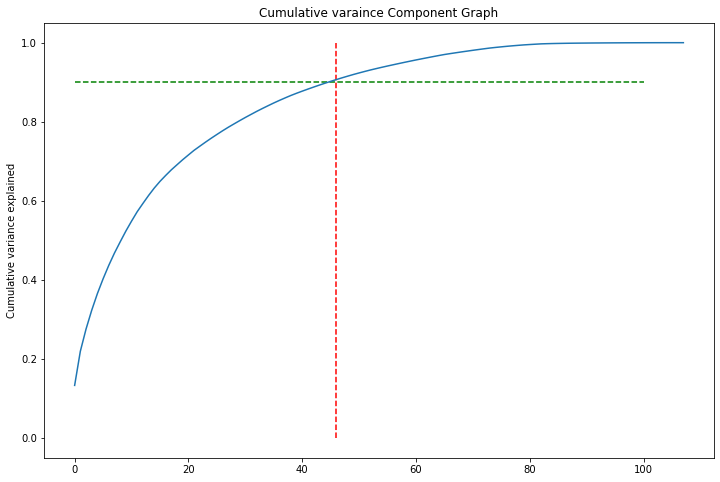

In [185]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=46, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.title('Cumulative varaince Component Graph')
plt.show()

In [154]:
pca = PCA(0.90,random_state=42)
x_resampled_pca = pca.fit_transform(x_resampled_scaled)

In [155]:
x_resampled_pca.shape

(38374, 46)

In [156]:
# Tranforming the test dataset
x_test_pca = pca.transform(x_test_scaled)

## Model 1 - Logistic Regression (with PCA)

##  Logistic Regression (PCA) - Hyper Parameter Tuning

In [157]:
pipline = Pipeline((('scaler',StandardScaler()),
                    ('pca',PCA()),
                    ('log_reg',LogisticRegression())))

parameters = {
    'pca__n_components': range(40,51),
    'log_reg__C': np.logspace(-4, 4, 10),
    'log_reg__penalty': ['l2']
}

grid_pipline = GridSearchCV(pipline,parameters,verbose=2,n_jobs=-1,return_train_score=True,scoring='recall',cv=4)

grid_pipline.fit(x_resampled,y_resampled)

Fitting 4 folds for each of 110 candidates, totalling 440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:  2.4min finished


GridSearchCV(cv=4,
             estimator=Pipeline(steps=(('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('log_reg', LogisticRegression()))),
             n_jobs=-1,
             param_grid={'log_reg__C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'log_reg__penalty': ['l2'],
                         'pca__n_components': range(40, 51)},
             return_train_score=True, scoring='recall', verbose=2)

## Best Score & Estimator

In [158]:
grid_pipline.best_score_

0.8789810749281548

In [159]:
grid_pipline.best_params_

{'log_reg__C': 1291.5496650148827,
 'log_reg__penalty': 'l2',
 'pca__n_components': 49}

In [160]:
temp_train = pd.DataFrame(y_resampled)
temp_train['Pred_Prob'] = grid_pipline.predict_proba(x_resampled)[:,1]
temp_train['Pred'] = np.where(temp_train['Pred_Prob']>0.35,1,0)
confusion_matrix(temp_train['churn'],temp_train['Pred'])

array([[14102,  5085],
       [ 1377, 17810]], dtype=int64)

In [161]:
print(metrics.recall_score(temp_train['churn'],temp_train['Pred']))

0.9282326575285349


## Prediction On Test Data

In [162]:
pred_log = grid_pipline.predict_proba(x_test)

In [163]:
temp = pd.DataFrame(y_test)
temp['Pred_Prob'] = pred_log[:,1]
temp['Pred'] = np.where(temp['Pred_Prob']>0.35,1,0)
confusion_matrix(temp['churn'],temp['Pred'])

array([[6098, 2133],
       [ 119,  654]], dtype=int64)

In [164]:
print(metrics.recall_score(temp['churn'],temp['Pred']))

0.8460543337645536


In [165]:
update_results('Log_reg_with_PCA',round(100*metrics.recall_score(temp['churn'],temp['Pred']),2))

,Model,Sensitivity
0,Log_reg_without_PCA,82.15
1,Log_reg_pipeline_PCA,84.61


## Results: Logistic Regression with PCA Model

## Train data set
- Sensitivity = 0.92

## Test data set
- Sensitivity = 0.85

## Model 2 - Random Forest (PCA)

## Hyper Parameter Tuning

In [166]:
pipline = Pipeline((('pca',PCA()),('rf',RandomForestClassifier())))

parameters = {
    'rf__n_estimators' : [300], #[200,300,400,500,600],
    'rf__max_depth' : [5,7],  #[5,7,9,11]
    'rf__max_features': [40], #[20,30,40]
    'rf__min_samples_split':[300,400] #[100,200,400]
}

grid_pipline = GridSearchCV(pipline,parameters,verbose=2,n_jobs=-1,scoring='recall',return_train_score=True,cv=3)

grid_pipline.fit(x_resampled_scaled,y_resampled)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed: 13.8min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 14.7min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=(('pca', PCA()),
                                       ('rf', RandomForestClassifier()))),
             n_jobs=-1,
             param_grid={'rf__max_depth': [5, 7], 'rf__max_features': [40],
                         'rf__min_samples_split': [300, 400],
                         'rf__n_estimators': [200, 300]},
             return_train_score=True, scoring='recall', verbose=2)

## Best Estimator & Score

In [167]:
grid_pipline.best_params_

{'rf__max_depth': 7,
 'rf__max_features': 40,
 'rf__min_samples_split': 300,
 'rf__n_estimators': 300}

In [168]:
grid_pipline.best_score_

0.8495342899841459

In [169]:
## Prediction on the Train dataset

temp_train = pd.DataFrame(y_resampled)
temp_train['Pred'] = grid_pipline.predict(x_resampled_scaled)
print(confusion_matrix(temp_train['churn'],temp_train['Pred']))


print(metrics.recall_score(temp_train['churn'],temp_train['Pred']))
print(metrics.accuracy_score(temp_train['churn'],temp_train['Pred']))

[[16989  2198]
 [ 2525 16662]]
0.8684004794913223
0.8769218741856465


## Prediction on the Test dataset

In [170]:
## Prediction on the Test dataset
temp = pd.DataFrame(y_test)
temp['Pred'] = grid_pipline.predict(x_test_scaled)
confusion_matrix(temp['churn'],temp['Pred'])

print(metrics.recall_score(temp['churn'],temp['Pred']))
print(metrics.accuracy_score(temp['churn'],temp['Pred']))

0.6959896507115135
0.8642825410928476


In [171]:
results = pd.DataFrame(grid_pipline.cv_results_)
results.sort_values('rank_test_score')[['mean_test_score','mean_train_score']].iloc[0]

mean_test_score     0.849534
mean_train_score    0.862173
Name: 5, dtype: float64

In [172]:
update_results('Random_Forest_with_PCA',round(100*metrics.recall_score(temp['churn'],temp['Pred'])))

,Model,Sensitivity
0,Log_reg_without_PCA,82.15
1,Log_reg_pipeline_PCA,84.61
2,Random_Forest_with_PCA,70.00


## Random Forest : Results

- We can see that there seems to be some overfitting in the Random Forest and the Sensitivity score is not giving good results

#### Train Dataset 
- Sensitivity = 85
- Accuracy = 86

#### Test Data
- Sensitivity = 70
- Accuracy = 86

## Model 3:  Decision Tree Classifier (PCA)

In [173]:
pipline = Pipeline([('dt',DecisionTreeClassifier(random_state=100))])


parameters = {
    'dt__criterion': ['gini'],#['gini','entropy'],
    'dt__max_depth':[5,7],
    'dt__max_features':[40]
}

grid_pipline = GridSearchCV(pipline,parameters,verbose=2,n_jobs=-1,scoring='recall',return_train_score=True,cv=4)

grid_pipline.fit(x_resampled_pca,y_resampled)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    2.0s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    6.3s finished


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('dt',
                                        DecisionTreeClassifier(random_state=100))]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini'], 'dt__max_depth': [5, 7],
                         'dt__max_features': [40]},
             return_train_score=True, scoring='recall', verbose=2)

#### Best Score & Estimator

In [174]:
grid_pipline.best_params_

{'dt__criterion': 'gini', 'dt__max_depth': 7, 'dt__max_features': 40}

In [175]:
grid_pipline.best_score_

0.8440618641446567

In [176]:
results = pd.DataFrame(grid_pipline.cv_results_)

results.sort_values('rank_test_score')[['mean_test_score','mean_train_score']].iloc[0]

mean_test_score     0.844062
mean_train_score    0.866889
Name: 1, dtype: float64

In [177]:
temp_train = pd.DataFrame(y_resampled)
temp_train['Pred'] = grid_pipline.predict(x_resampled_pca)
print(confusion_matrix(temp_train['churn'],temp_train['Pred']))


print(metrics.recall_score(temp_train['churn'],temp_train['Pred']))
print(metrics.accuracy_score(temp_train['churn'],temp_train['Pred']))

[[15792  3395]
 [ 2456 16731]]
0.871996664408193
0.8475269713868765


In [178]:
temp = pd.DataFrame(y_test)
temp['Pred'] = grid_pipline.predict(x_test_pca)
confusion_matrix(temp['churn'],temp['Pred'])

print(metrics.recall_score(temp['churn'],temp['Pred']))
print(metrics.accuracy_score(temp['churn'],temp['Pred']))

0.6985769728331177
0.7989782318969347


In [179]:
results_df = update_results('Decision Tree',100 *round(metrics.recall_score(temp['churn'],temp['Pred']),2))

In [180]:
results_df

,Model,Sensitivity
0,Log_reg_without_PCA,82.15
1,Log_reg_pipeline_PCA,84.61
2,Random_Forest_with_PCA,70.00
3,Decision Tree,70.00


## Decision Tree: Results

#### Train Dataset 
- Sensitivity = 87
- Accuracy = 84

#### Test Data
- Sensitivity = 70
- Accuracy = 80

## Senstivity/Recall for all the Model

In [186]:
results_df

,Model,Sensitivity
0,Log_reg_without_PCA,82.15
1,Log_reg_pipeline_PCA,84.61
2,Random_Forest_with_PCA,70.00
3,Decision Tree,70.00


## Best Performing High Performance Model


## Logistic Regression with PCA

- We can clearly see that the Senstivity of the Logistic Regression with PCA is the Highest of all the Models

Below is the Score of the Logistic Regression with PCA

#### Train Dataset
- Sensitivity = 92

### Test Data
- Sensitivity = 84

# Top Variables from the Interpretable Model (Logistic Regression without PCA)

In [182]:
betas

,Log_reg,abs_coef
total_ic_mou_8,-2.763536,2.763536
monthly_2g_8,-1.013815,1.013815
total_ic_mou_7,0.921508,0.921508
monthly_3g_8,-0.626516,0.626516
sachet_2g_8,-0.499214,0.499214
std_og_t2t_mou_8,-0.491816,0.491816
spl_ic_mou_8,-0.471082,0.471082
std_og_t2m_mou_8,-0.419783,0.419783
std_og_t2m_mou_6,0.348731,0.348731
const,-0.278664,0.278664


## Top 5 Variables from the Interpretable Model

In [183]:
betas.head()

,Log_reg,abs_coef
total_ic_mou_8,-2.763536,2.763536
monthly_2g_8,-1.013815,1.013815
total_ic_mou_7,0.921508,0.921508
monthly_3g_8,-0.626516,0.626516
sachet_2g_8,-0.499214,0.499214


# Business Recommendations: Reducing Telecom Churn 

#### The coeffiecients of most of the top variables are negative, meaning that most of the Variables are negatively/inversely related to the Churn

- The customers whose total incoming minutes of Usage is less in the month of August(8th month) have high chance of Churing.
- Cutomers who have a decreased usage of monthly2g usage for August as compared to month 6&7  are most probable to churn.
- There is significant decrease in the monthly3g usage in August for the customers more likely to be churned.
- Customers having decreasing STD outgoing minutes of usage within the same operator & to other operator are likely to churn.
- Cutomers having reduced Special incoming calls are at higher chances to churn.
- The company should also target the customers for which the total outgoing calls is reducing significantly in the month of August (Explained in the Graph)